<a href="https://colab.research.google.com/github/utper/Capstone/blob/master/pds2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

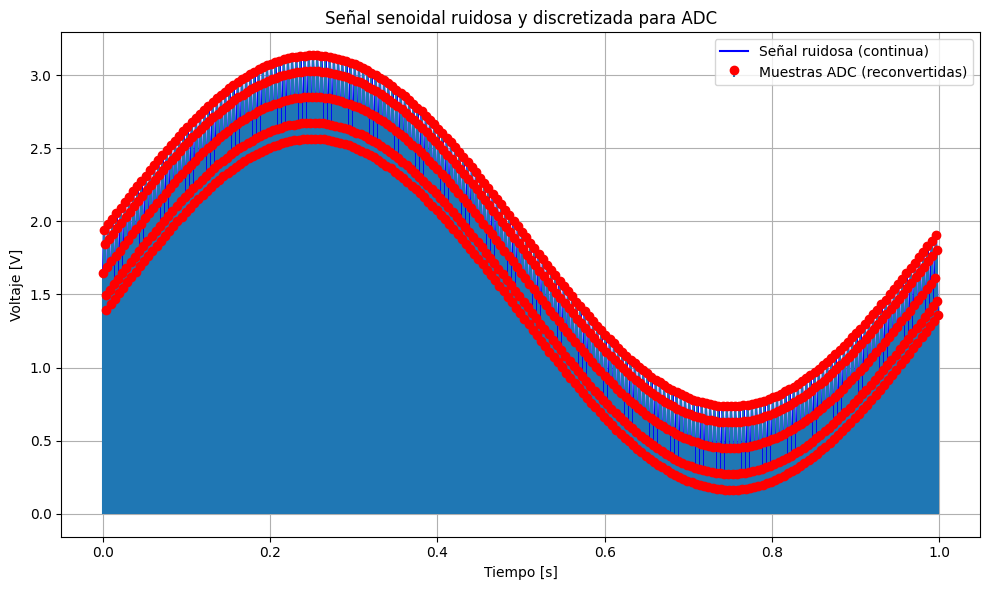

Arreglo de muestras (int 12 bits):
[2047, 2410, 2285, 1856, 1730, 2094, 2457, 2331, 1903, 1777, 2141, 2504, 2378, 1950, 1824, 2187, 2551, 2425, 1996, 1870, 2234, 2597, 2471, 2043, 1917, 2280, 2643, 2517, 2089, 1963, 2326, 2689, 2563, 2135, 2009, 2372, 2735, 2609, 2180, 2054, 2417, 2780, 2654, 2226, 2099, 2462, 2825, 2699, 2271, 2144, 2507, 2870, 2744, 2315, 2189, 2551, 2914, 2788, 2359, 2232, 2595, 2958, 2831, 2402, 2276, 2638, 3001, 2874, 2445, 2318, 2681, 3044, 2917, 2487, 2361, 2723, 3085, 2958, 2529, 2402, 2764, 3127, 3000, 2570, 2443, 2805, 3167, 3040, 2610, 2483, 2845, 3207, 3079, 2650, 2522, 2884, 3246, 3118, 2688, 2561, 2922, 3284, 3156, 2726, 2598, 2960, 3321, 3193, 2763, 2635, 2996, 3357, 3229, 2799, 2671, 3032, 3393, 3265, 2834, 2705, 3066, 3427, 3299, 2868, 2739, 3100, 3461, 3332, 2901, 2772, 3133, 3493, 3364, 2933, 2804, 3164, 3524, 3395, 2964, 2834, 3194, 3554, 3425, 2993, 2864, 3224, 3583, 3454, 3022, 2892, 3252, 3611, 3481, 3049, 2919, 3279, 3638, 3508, 3075, 2945, 3304

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
fs = 1000  # Frecuencia de muestreo: 100 Hz
t = np.arange(0, 1, 1/fs)  # de 0 a 1 s con paso 0.01 s

# Señal senoidal principal
amplitud_seno = 1.2  # mitad de 3.3 V para permitir offset
frecuencia_seno = 1  # Hz
senoidal = amplitud_seno * np.sin(2 * np.pi * frecuencia_seno * t)

# Señal de ruido
amplitud_ruido = 0.3
frecuencia_ruido = 200  # Hz
ruido = amplitud_ruido * np.sin(2 * np.pi * frecuencia_ruido * t)

senal_ruidosa = senoidal + ruido + 1.65  # ahora toda la señal está entre ~0 y ~3.3 V


adc_bits = 12
adc_max = 2**adc_bits - 1
senal_adc = (senal_ruidosa / 3.3) * adc_max
# 1️⃣ np.clip(senal_adc, 0, adc_max)
#   * Limita (clip) los valores de senal_adc para que no sean menores que 0 ni mayores que adc_max.
#   * Si senal_adc contiene valores negativos, los convierte en 0.
#   * Si tiene valores mayores que adc_max, los reduce a adc_max.
# 2️⃣ .astype(int)
#   * Convierte los valores resultantes a números enteros (int).
#   * Esto es importante porque los ADC suelen trabajar con valores enteros discretos.
senal_adc = np.clip(senal_adc, 0, adc_max).astype(int)

plt.figure(figsize=(10, 6))
plt.plot(t, senal_ruidosa, label='Señal ruidosa (continua)', color='blue')
plt.stem(t, senal_adc * 3.3 / adc_max, label='Muestras ADC (reconvertidas)', basefmt=" ", markerfmt='ro')  # reconvertimos a V
plt.title("Señal senoidal ruidosa y discretizada para ADC")
plt.xlabel("Tiempo [s]")
plt.ylabel("Voltaje [V]")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print("Arreglo de muestras (int 12 bits):")
print(senal_adc.tolist())